In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import boston_housing

(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
training_dataset_x.shape

(404, 13)

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(training_dataset_x)
training_dataset_x = mms.transform(training_dataset_x)
test_dataset_x = mms.transform(test_dataset_x)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model  = Sequential(name = "boston_housing_price")
model.add(Dense(100, input_dim = training_dataset_x.shape[1], activation ="relu", name = "hidden-1"))
model.add(Dense(100, activation = "relu", name = "hidden-2"))
model.add(Dense(1, activation = "linear", name = 'output'))

In [6]:
model.compile(optimizer="rmsprop", loss= "mse", metrics=["mae"])
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Epoch 1/100
11/11 [==============================] - 0s 9ms/step - loss: 8.2927 - mae: 2.0322 - val_loss: 12.7225 - val_mae: 2.6883
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 8.1534 - mae: 2.0175 - val_loss: 13.5623 - val_mae: 2.7964
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 8.1036 - mae: 2.0648 - val_loss: 12.2301 - val_mae: 2.6611
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 8.1393 - mae: 2.0150 - val_loss: 16.7671 - val_mae: 3.0969
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 8.1489 - mae: 2.0310 - val_loss: 14.3966 - val_mae: 2.8759
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 8.8874 - mae: 2.1358 - val_loss: 10.9098 - val_mae: 2.4548
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 7.6929 - mae: 1.9330 - val_loss: 12.6314 - val_mae: 2.5742
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 7.8

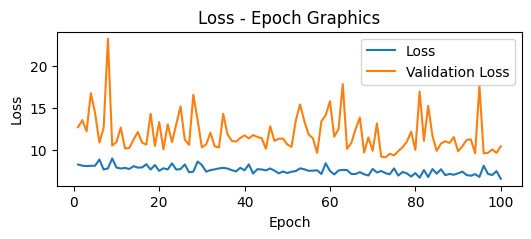

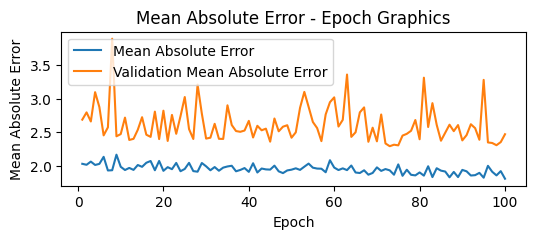

In [14]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)

# this part is for drawing the graphs
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((6, 2))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()
print("")
figure = plt.gcf()
figure.set_size_inches((6, 2))
plt.title('Mean Absolute Error - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(range(1, len(hist.history['mae']) + 1), hist.history['mae'])
plt.plot(range(1, len(hist.history['val_mae']) + 1), hist.history['val_mae'])
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'])
plt.show()

In [15]:
test_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

4/4 [==============================] - 0s 3ms/step - loss: 24.8460 - mae: 3.1924
loss ---> 24.846012115478516
mae ---> 3.19240665435791


In [16]:
predict_result = model.predict(test_dataset_x)

4/4 [==============================] - 0s 3ms/step


In [17]:
for i in range(len(predict_result)):
  print(predict_result[i], test_dataset_y[i])

[9.539135] 7.2
[17.127552] 18.8
[20.505163] 19.0
[33.418854] 27.0
[23.14439] 22.2
[19.104662] 24.5
[26.708328] 31.2
[21.36278] 22.9
[18.628937] 20.5
[19.715668] 23.2
[15.355048] 18.6
[16.150457] 14.5
[15.871889] 17.8
[39.32202] 50.0
[17.582043] 20.8
[19.185543] 24.3
[24.337137] 24.2
[20.64657] 19.8
[16.6598] 19.1
[29.877125] 22.7
[10.001662] 12.0
[14.989123] 10.2
[19.674725] 20.0
[15.061917] 18.5
[19.733343] 20.9
[22.800283] 23.0
[27.410078] 27.5
[25.29475] 30.1
[10.40754] 9.5
[20.228401] 22.0
[19.231153] 21.2
[13.842674] 14.1
[32.404003] 33.1
[22.80006] 23.4
[15.500188] 20.1
[7.301379] 7.4
[15.15328] 15.4
[16.492022] 23.8
[16.194235] 20.1
[24.53609] 24.5
[24.300787] 33.0
[26.05833] 28.4
[13.380141] 14.1
[40.167458] 46.7
[27.638569] 32.5
[22.714336] 29.6
[25.22845] 28.4
[16.927898] 19.8
[23.360693] 20.2
[21.426243] 25.0
[30.97664] 35.4
[18.092009] 20.3
[9.8985195] 9.7
[14.744948] 14.5
[34.987072] 34.9
[25.812054] 26.6
[12.2683] 7.2
[45.340298] 50.0
[34.753765] 32.4
[22.116201] 21.6
[24

In [20]:
from sklearn.metrics import r2_score
r2_score( test_dataset_y,predict_result)

0.7015273126124537